In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [31]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers =centers, cluster_std = 0.4)


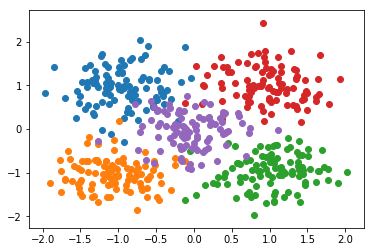

In [32]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [34]:
y_cat = to_categorical(y, 5)
print(y_cat)


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [35]:
model = Sequential()
model.add(Dense(units =5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])


In [36]:
model.fit(x=X, y=y_cat, verbose =1, batch_size= 50, epochs = 100)


Epoch 1/100
500/500 [==============================] - 0s 888us/step - loss: 1.3543 - acc: 0.4440
Epoch 2/100
500/500 [==============================] - 0s 113us/step - loss: 0.6549 - acc: 0.7940
Epoch 3/100
500/500 [==============================] - 0s 96us/step - loss: 0.4324 - acc: 0.9160
Epoch 4/100
500/500 [==============================] - 0s 101us/step - loss: 0.3384 - acc: 0.9320
Epoch 5/100
500/500 [==============================] - 0s 98us/step - loss: 0.2952 - acc: 0.9400
Epoch 6/100
500/500 [==============================] - 0s 102us/step - loss: 0.2687 - acc: 0.9460
Epoch 7/100
500/500 [==============================] - 0s 86us/step - loss: 0.2490 - acc: 0.9460
Epoch 8/100
500/500 [==============================] - 0s 88us/step - loss: 0.2358 - acc: 0.9480
Epoch 9/100
500/500 [==============================] - 0s 104us/step - loss: 0.2249 - acc: 0.9500
Epoch 10/100
500/500 [==============================] - 0s 86us/step - loss: 0.2179 - acc: 0.9460
Epoch 11/100
500/500 [==

500/500 [==============================] - 0s 71us/step - loss: 0.1522 - acc: 0.9500
Epoch 85/100
500/500 [==============================] - 0s 55us/step - loss: 0.1546 - acc: 0.9520
Epoch 86/100
500/500 [==============================] - 0s 53us/step - loss: 0.1549 - acc: 0.9480
Epoch 87/100
500/500 [==============================] - 0s 74us/step - loss: 0.1526 - acc: 0.9500
Epoch 88/100
500/500 [==============================] - 0s 53us/step - loss: 0.1519 - acc: 0.9500
Epoch 89/100
500/500 [==============================] - 0s 61us/step - loss: 0.1523 - acc: 0.9500
Epoch 90/100
500/500 [==============================] - 0s 50us/step - loss: 0.1516 - acc: 0.9480
Epoch 91/100
500/500 [==============================] - 0s 62us/step - loss: 0.1530 - acc: 0.9480
Epoch 92/100
500/500 [==============================] - 0s 57us/step - loss: 0.1509 - acc: 0.9500
Epoch 93/100
500/500 [==============================] - 0s 59us/step - loss: 0.1516 - acc: 0.9460
Epoch 94/100
500/500 [===========

In [37]:
def plot_decision_boundary(X,y_cat,model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1 , max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid) 
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

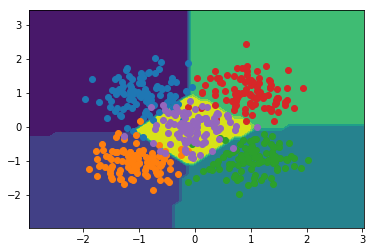

In [38]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

prediction [3]


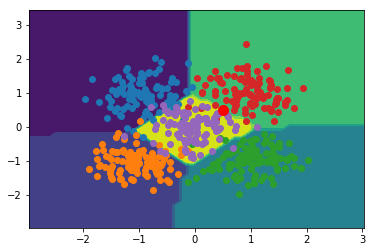

In [39]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x =0.5
y =0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("prediction", prediction)